# TP 2 to Machine Learning
Diane Lingrand (diane.lingrand@univ-cotedazur)

Julie Tores (julie.tores@univ-cotedazur.fr ou julie.tores@etu.univ-cotedazur.fr)

Polytech, SI4, 2023-24

In [144]:
#necessary imports
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## dataset: Iris

In [145]:
# loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

**Question 1:** how many data ?

In [146]:
# your code
print("there is ", len(X), "datas")

there is  150 datas


**Question 2**: type of data ? dimension of data ? type of labels ?

In [147]:
# your code
print("type of data: images")
print("dimension of data: ", X.shape)
print("type of labels: classes (integer between 0 and 2)")

type of data: images
dimension of data:  (150, 4)
type of labels: classes (integer between 0 and 2)


**Question 3:** How many classes ? How many samples per class ?

In [148]:
# your code
print(len(np.unique(y)), "classes")
unique, counts = np.unique(y, return_counts=True)
for i in unique:
    print(i , counts[i])



3 classes
0 50
1 50
2 50


## Using destination tree algorithm

In [149]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
myTree = tree.DecisionTreeClassifier()
myTree.fit(X_train, y_train)
print("score on train set without change in hyperparameters: ", myTree.score(X_train, y_train))


score on train set without change in hyperparameters:  1.0


In [150]:
# validate tree with hyperparameters
parameters = {'max_depth':range(1,10), 'criterion':['gini', 'entropy']}
bestParametres = {'max_depth':0, 'criterion':0}
bestScore = 0
for i in parameters['max_depth']:
    for j in parameters['criterion']:
        myTree = tree.DecisionTreeClassifier(max_depth=i, criterion=j)
        myTree.fit(X_train, y_train)
        score = myTree.score(X_val, y_val)
        if score > bestScore:
            bestScore = score
            bestParametres['max_depth'] = i
            bestParametres['criterion'] = j
print("best score: ", bestScore)
print("best parameters: ", bestParametres)





best score:  1.0
best parameters:  {'max_depth': 2, 'criterion': 'gini'}


[Text(148.8, 201.90857142857143, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 90\nvalue = [27, 31, 32]'),
 Text(111.60000000000001, 170.84571428571428, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(186.0, 170.84571428571428, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 63\nvalue = [0, 31, 32]'),
 Text(111.60000000000001, 139.78285714285715, 'X[2] <= 5.35\nentropy = 0.523\nsamples = 34\nvalue = [0, 30, 4]'),
 Text(74.4, 108.72, 'X[3] <= 1.45\nentropy = 0.337\nsamples = 32\nvalue = [0, 30, 2]'),
 Text(37.2, 77.65714285714284, 'entropy = 0.0\nsamples = 23\nvalue = [0, 23, 0]'),
 Text(111.60000000000001, 77.65714285714284, 'X[1] <= 2.6\nentropy = 0.764\nsamples = 9\nvalue = [0, 7, 2]'),
 Text(74.4, 46.59428571428572, 'X[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(37.2, 15.531428571428563, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(111.60000000000001, 15.531428571428563, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(148.8, 46.59428571428572

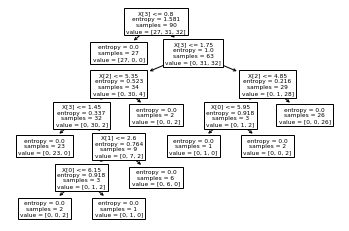

In [151]:
# compute the tree
tree.plot_tree(myTree)

accuracy:  0.9666666666666667


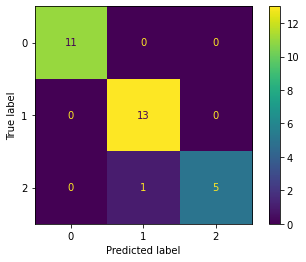

In [152]:
# test the tree
ypred = myTree.predict(X_test)


# compute the accuracy
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
print("accuracy: ", accuracy_score(y_test, ypred))

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred , labels=None, sample_weight=None, normalize=None)
irisPredWithTree = ypred
ConfusionMatrixDisplay(cm, display_labels=None).plot()


# digit dataset

In [153]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [154]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# train the tree
myTree = tree.DecisionTreeClassifier(random_state=42)
myTree.fit(X_train, y_train)

# compute the accuracy
ypred = myTree.predict(X_test)
print("accuracy without hyperparameters: ", accuracy_score(y_test, ypred))

# print hyperparameters of the tree
print("hyperparameters: ", myTree.get_params())


accuracy without hyperparameters:  0.8583333333333333
hyperparameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


best score:  0.8607242339832869
best parameters:  {'max_depth': 9, 'criterion': 'entropy'}
accuracy with hyperparameters:  0.8805555555555555


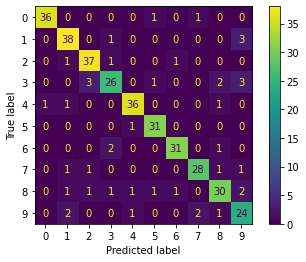

In [155]:
# validate tree with hyperparameters
parameters = {'max_depth':range(1,150), 'criterion':['gini', 'entropy'], 'min_samples_split':range(2,10)}
bestParametres = {'max_depth':0, 'criterion':0}
bestScore = 0
for i in parameters['max_depth']:
    for j in parameters['criterion']:
        for l in parameters['min_samples_split']:
            myTree = tree.DecisionTreeClassifier(max_depth=i, criterion=j, min_samples_split=l, random_state=42)
            myTree.fit(X_train, y_train)
            score = myTree.score(X_val, y_val)
            if score > bestScore:
                bestScore = score
                bestParametres['max_depth'] = i
                bestParametres['criterion'] = j

print("best score: ", bestScore)
print("best parameters: ", bestParametres)


# train the tree with the best hyperparameters
myTree = tree.DecisionTreeClassifier(max_depth=bestParametres['max_depth'], criterion=bestParametres['criterion'], random_state=42)
myTree.fit(X_train, y_train)

# compute the accuracy
ypred = myTree.predict(X_test)
print("accuracy with hyperparameters: ", accuracy_score(y_test, ypred))

# plot the confusion matrix
cm = confusion_matrix(y_test,ypred , labels=None, sample_weight=None, normalize=None)
ConfusionMatrixDisplay(cm, display_labels=None).plot()



# TP3- PCA

## Part 1

In [156]:
from sklearn import datasets
from sklearn.decomposition import PCA
X, y = datasets.load_iris(return_X_y=True)
pca4 = PCA(n_components=2)
pca4.fit(X)
X4 = pca4.transform(X)
print("explained variance : ", pca4.explained_variance_ratio_)
print("sum of explained variance : ", pca4.explained_variance_ratio_.sum())

explained variance :  [0.92461872 0.05306648]
sum of explained variance :  0.977685206318795


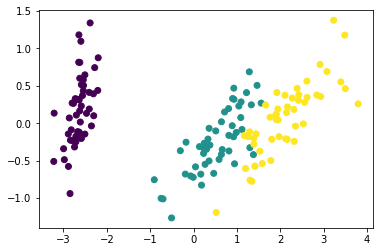

In [157]:
# plot digits after PCA with 2 components
import matplotlib.pyplot as plt
plt.scatter(X4[:,0], X4[:,1], c=y)
plt.show()


## Part 2

In [158]:
from sklearn import manifold
digits = datasets.load_digits()
X = digits.data
y = digits.target
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

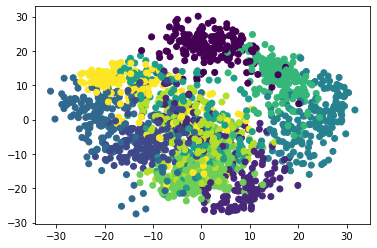

In [159]:
# plot digits after PCA with 2 components
pca4 = PCA(n_components=2)
pca4.fit(X)
X4 = pca4.transform(X)
import matplotlib.pyplot as plt
plt.scatter(X4[:,0], X4[:,1], c=y)
plt.show()

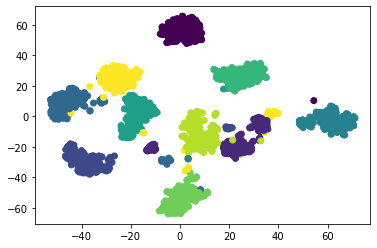

In [160]:
# plot digits after t-SNE with 2 components
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
plt.show()

In [161]:
# compare the speed of transformation of PCA and t-SNE
import time
start = time.time()
pca4 = PCA(n_components=2)
pca4.fit(X)
X4 = pca4.transform(X)
end = time.time()
print("time of PCA: ", end - start)

start = time.time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
end = time.time()
print("time of t-SNE: ", end - start)


time of PCA:  0.014572858810424805
time of t-SNE:  12.798405170440674


We can see that the transformation is quicker with PCA than with t-SNE.

### Tree classifier with PCA (2 dimension)

accuracy without hyperparameters:  0.5805555555555556
hyperparameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
best score:  0.6295264623955432
best parameters:  {'max_depth': 7, 'criterion': 'gini'}
accuracy with hyperparameters:  0.6361111111111111


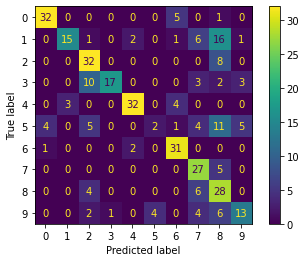

In [162]:
# decision tree with PCA
from sklearn import tree
from sklearn.model_selection import train_test_split

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# train the tree
myTree = tree.DecisionTreeClassifier(random_state=42)
myTree.fit(X_train, y_train)

# compute the accuracy
ypred = myTree.predict(X_test)
print("accuracy without hyperparameters: ", accuracy_score(y_test, ypred))

# print hyperparameters of the tree
print("hyperparameters: ", myTree.get_params())

# validate tree with hyperparameters
parameters = {'max_depth':range(1,10), 'criterion':['gini', 'entropy']}
bestParametres = {'max_depth':0, 'criterion':0}
bestScore = 0
for i in parameters['max_depth']:
    for j in parameters['criterion']:
        myTree = tree.DecisionTreeClassifier(max_depth=i, criterion=j)
        myTree.fit(X_train, y_train)
        score = myTree.score(X_val, y_val)
        if score > bestScore:
            bestScore = score
            bestParametres['max_depth'] = i
            bestParametres['criterion'] = j

print("best score: ", bestScore)
print("best parameters: ", bestParametres)

# train the tree with the best hyperparameters
myTree = tree.DecisionTreeClassifier(max_depth=bestParametres['max_depth'], criterion=bestParametres['criterion'], random_state=42)
myTree.fit(X_train, y_train)

# compute the accuracy
ypred = myTree.predict(X_test)
print("accuracy with hyperparameters: ", accuracy_score(y_test, ypred))

# plot the confusion matrix
cm = confusion_matrix(y_test,ypred , labels=None, sample_weight=None, normalize=None)
ConfusionMatrixDisplay(cm, display_labels=None).plot()



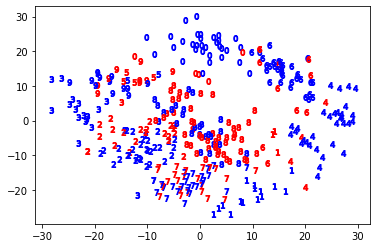

In [163]:
colors = ['red' if y_test_val != ypred_val  else 'blue' for y_test_val, ypred_val in zip(y_test, ypred)]
# use y_test as marker

for i in range(len(X_test)):
    plt.scatter(X_test[i,0], X_test[i,1], c=colors[i], marker="$"+str(ypred[i])+"$")
plt.show()

### Tree classifier with T-sne (2 dimensions)

accuracy without hyperparameters:  0.9861111111111112
hyperparameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
best score:  0.9805013927576601
best parameters:  {'max_depth': 7, 'criterion': 'entropy'}
accuracy with hyperparameters:  0.9861111111111112


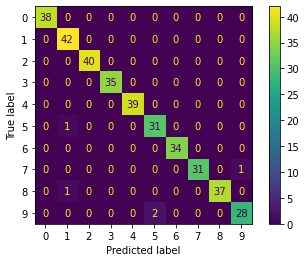

In [164]:
# decision tree with t-SNE
from sklearn import tree
from sklearn.model_selection import train_test_split

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# train the tree
myTree = tree.DecisionTreeClassifier(random_state=42)
myTree.fit(X_train, y_train)

# compute the accuracy
ypred = myTree.predict(X_test)
print("accuracy without hyperparameters: ", accuracy_score(y_test, ypred))

# print hyperparameters of the tree
print("hyperparameters: ", myTree.get_params())

# validate tree with hyperparameters
parameters = {'max_depth':range(1,10), 'criterion':['gini', 'entropy']}
bestParametres = {'max_depth':0, 'criterion':0}
bestScore = 0
for i in parameters['max_depth']:
    for j in parameters['criterion']:
        myTree = tree.DecisionTreeClassifier(max_depth=i, criterion=j)
        myTree.fit(X_train, y_train)
        score = myTree.score(X_val, y_val)
        if score > bestScore:
            bestScore = score
            bestParametres['max_depth'] = i
            bestParametres['criterion'] = j

print("best score: ", bestScore)
print("best parameters: ", bestParametres)

# train the tree with the best hyperparameters
myTree = tree.DecisionTreeClassifier(max_depth=bestParametres['max_depth'], criterion=bestParametres['criterion'], random_state=42)
myTree.fit(X_train, y_train)

# compute the accuracy
ypred = myTree.predict(X_test)
print("accuracy with hyperparameters: ", accuracy_score(y_test, ypred))

# plot the confusion matrix
cm = confusion_matrix(y_test,ypred , labels=None, sample_weight=None, normalize=None)
ConfusionMatrixDisplay(cm, display_labels=None).plot()


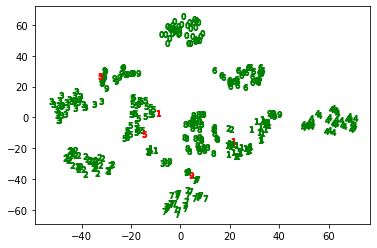

In [165]:
colors = ['red' if y_test_val != ypred_val  else 'green' for y_test_val, ypred_val in zip(y_test, ypred)]
# use y_test as marker

for i in range(len(X_test)):
    plt.scatter(X_test[i,0], X_test[i,1], c=colors[i], marker="$"+str(ypred[i])+"$")
plt.show()